#CafChem tools for Hit expansion

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/Hit_Expansion_CafChem.ipynb)

## This notebook allows you to:
- use generative mask-filling to create analogues of a given molecular SMILES string
- perform substitutions on substituted and unsubstituted carbons on a ring on a molecular SMILES string.

## Requirements:
- This notebook will install deepchem, datasets, and py3Dmol
- It will pull the CafChem tools from Github.
- It will install all needed libraries.
- You need to have a HF_Token set as a secret to access the mask-filling model.

## Set-up libraries

In [ ]:
! pip install -U datasets
! pip install deepchem
! pip install py3Dmol

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.7.0
    Uninstalling fsspec-2025.7.0:
      Successfully uninstalled fsspec-2025.7.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.7.0 requires fsspec==2025.7.0, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pla

In [ ]:
!git clone https://github.com/MauricioCafiero/CafChem.git

Cloning into 'CafChem'...
remote: Enumerating objects: 727, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 727 (delta 124), reused 54 (delta 54), pack-reused 571 (from 2)
Receiving objects: 100% (727/727), 42.31 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (412/412), done.


In [ ]:
import torch
import pandas as pd
import numpy as np
import os
import re
from google.colab import files
import CafChem.CafChemSubs as ccs

cpuCount = os.cpu_count()
print("Number of CPUs in the system:", cpuCount)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Number of CPUs in the system: 2


## Set up HF models for mask-filling
- must have a HF token enabled!

In [ ]:
model_size = 250
model_name = f"cafierom/bert-base-cased-ChemTok-ZN{model_size}K-V1"
ccs.genmask_model_setup(model_size, model_name)

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Device set to use cpu


## Substitutions
- Create substitutions on phenyl rings.
- use ccs.which_fragments() to see what fragments are defined for substitution.
- use ccs.add_fragment() to add your own fragments.
- check the Tanimoto similarity against a known active (using morgan fingerprints)

In [ ]:
number_subs = 1         # how many substitutions to make per molecule
smile = 'c1cc2OC(=O)C(=Cc2cc1)c3ccccc3'
ccs.which_fragments()
ccs.add_fragment("c(C)c", "methyl")
smiles_list, qed_list, mol_list, legends_list, pic = ccs.sub_rings(smile,number_subs)

substitution_dict = {"Substituted Molecules": smiles_list}
df = pd.DataFrame.from_dict(substitution_dict)
csv_string = f"Ring_sub_{int(len(smiles_list))}_on_{smile}"
csv_string = csv_string.strip(" ")
print(f"Saving: {csv_string}")
df.to_csv(csv_string+".csv",index=False)

Name: Fluoro     Fragment: c(F)c
Name: Cyano     Fragment: c(C#N)c
Name: Iodo     Fragment: c(I)c
Name: Nitro     Fragment: c([N+]([O-])=O)c
Name: Methoxy     Fragment: c(OC)c
Name: Chloro     Fragment: c(Cl)c
Fragment added:
Name: methyl     Fragment: c(C)c
Substituted 14 molecules
Could not match 0 requests.
Saving: Ring_sub_14_on_c1cc2OC(=O)C(=Cc2cc1)c3ccccc3


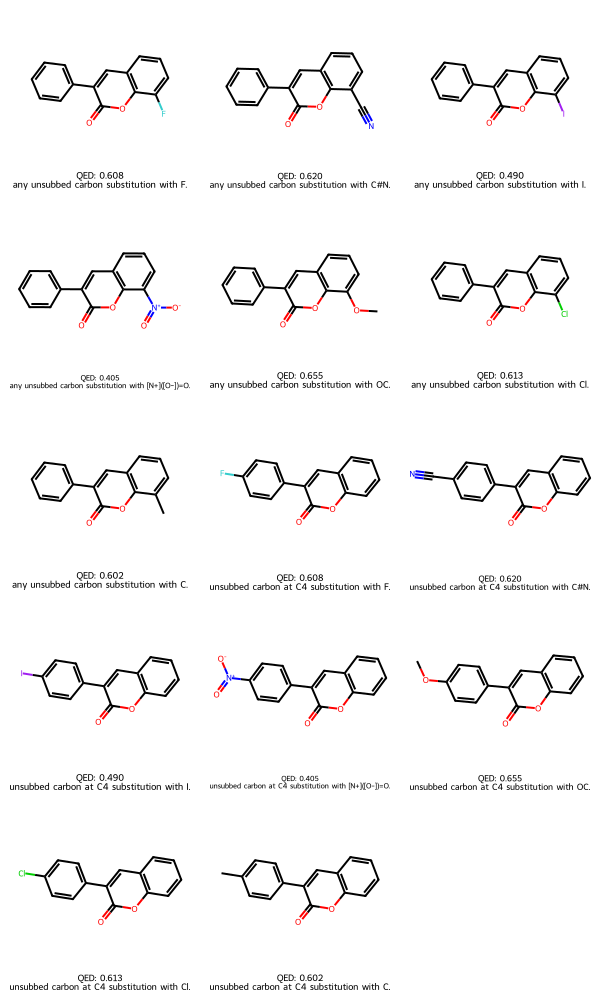

In [ ]:
pic

In [ ]:
sim_mat, sim_list = ccs.calculate_similarities("c1cc(O)c(O)cc1",smiles_list, 0.55)

Molecules 0 and 1 have a similarity of 0.75.
Molecules 0 and 2 have a similarity of 0.79.
Molecules 0 and 3 have a similarity of 0.73.
Molecules 0 and 4 have a similarity of 0.75.
Molecules 0 and 5 have a similarity of 0.79.
Molecules 0 and 6 have a similarity of 0.79.
Molecules 0 and 7 have a similarity of 0.60.
Molecules 0 and 9 have a similarity of 0.55.
Molecules 0 and 12 have a similarity of 0.55.
Molecules 0 and 13 have a similarity of 0.55.
Molecules 1 and 2 have a similarity of 0.75.
Molecules 1 and 3 have a similarity of 0.70.
Molecules 1 and 4 have a similarity of 0.72.
Molecules 1 and 5 have a similarity of 0.75.
Molecules 1 and 6 have a similarity of 0.75.
Molecules 1 and 8 have a similarity of 0.59.
Molecules 2 and 3 have a similarity of 0.73.
Molecules 2 and 4 have a similarity of 0.75.
Molecules 2 and 5 have a similarity of 0.79.
Molecules 2 and 6 have a similarity of 0.79.
Molecules 2 and 7 have a similarity of 0.55.
Molecules 2 and 9 have a similarity of 0.60.
Molecule

[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator
[11:59:38] DEPRECATION WARNING: please use MorganGenerator


## Mask-filling

First masking generated 6 SMILES
Last masking generated 3 SMILES
Random masking generated 1 SMILES
Random masking generated 2 SMILES
Random masking generated 1 SMILES
Random masking generated 2 SMILES
Total SMILES generated: 15
Total unique SMILES generated: 8
Average entropy: 0.4156590654386187
Total SMILES generated for hit: 8
analogue 1: OOc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.440
analogue 2: CCOc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.821
analogue 3: CC(=O)c1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.651
analogue 4: Oc1ccc(/C=C/c2cc(O)ccc2O)cc1 with QED: 0.547
analogue 5: Oc1ccc(/C=C\c2cc(O)cc(O)c2)cc1 with QED: 0.692
analogue 6: Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.692
analogue 7: COc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.812
analogue 8: Cc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.768

Average entropy: 0.4156590654386187


[11:59:44] Explicit valence for atom # 0 O, 3, is greater than permitted
[11:59:44] SMILES Parse Error: Failed parsing SMILES 'Olc1ccc(cc1)\C=C\c2cc(O)cc(O)c2' for input: 'Olc1ccc(cc1)\C=C\c2cc(O)cc(O)c2'
[11:59:44] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[11:59:44] SMILES Parse Error: unclosed ring for input: 'Oc1ccc(cc1)\C=C\c2cc(O)ccc1O'
[11:59:44] SMILES Parse Error: unclosed ring for input: 'Oc1ccc(cc1)\C=C\c2cc(O)cc(O)O'
[11:59:44] SMILES Parse Error: unclosed ring for input: 'Oc1ccc(cc1)\C=C\c1cc(O)cc(O)c2'


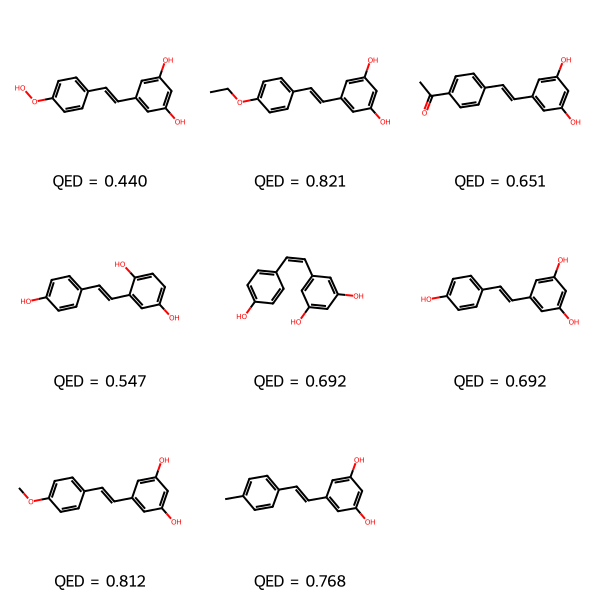

In [ ]:
mol_to_fill = "Oc1ccc(cc1)\C=C\c2cc(O)cc(O)c2"
percent_to_use = 0.1

unique_smiles, unique_entropies, qeds, mols, out_text, pic = ccs.gen_mask(mol_to_fill,percent_to_use)

print(out_text)
print(f"Average entropy: {sum(unique_entropies)/len(unique_entropies)}")

pic

## Calculate Lipinski properties

In [ ]:
qed, mols, Molecular_weight, aLogP, Hydrogen_bond_acceptors, Hydrogen_bond_donors,\
           Polar_surface_area, Rotatable_Bonds, Aromatic_Rings, Undesireable_moieties = ccs.calc_qed(unique_smiles, lip_props = True)

In [ ]:
for smile, logp in zip(unique_smiles, aLogP):
  print(f"{smile:40}: {logp:10.3f}")

OOc1ccc(/C=C/c2cc(O)cc(O)c2)cc1         :      3.120
CCOc1ccc(/C=C/c2cc(O)cc(O)c2)cc1        :      3.667
CC(=O)c1ccc(/C=C/c2cc(O)cc(O)c2)cc1     :      3.471
Oc1ccc(/C=C/c2cc(O)ccc2O)cc1            :      2.974
Oc1ccc(/C=C\c2cc(O)cc(O)c2)cc1          :      2.974
Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1          :      2.974
COc1ccc(/C=C/c2cc(O)cc(O)c2)cc1         :      3.277
Cc1ccc(/C=C/c2cc(O)cc(O)c2)cc1          :      3.577


## Using both techniques

In [ ]:
resveratrol = "Oc1ccc(cc1)\C=C\c2cc(O)cc(O)c2"
percent_to_use = 0.15

unique_smiles, unique_entropies, qeds, mols, out_text, pic = ccs.gen_mask(resveratrol,percent_to_use)
print(out_text)

total_smiles = []
total_qed = []
total_mols = []
for smile in unique_smiles:
  smiles_list, qed_list, mol_list, legends_list, pic = ccs.sub_rings(smile,number_subs)
  total_smiles.extend(smiles_list)
  total_qed.extend(qed_list)
  total_mols.extend(mol_list)

qed_leg = [f"QED: {qed:.3f}" for qed in total_qed]
print("=============================================================")
print(f"Total molecules made: {len(total_smiles)}")
print(f"Total QED: {sum(total_qed)/len(total_qed)}")

First masking generated 6 SMILES
Last masking generated 3 SMILES
Random masking generated 2 SMILES
Random masking generated 0 SMILES
Random masking generated 3 SMILES
Random masking generated 3 SMILES
Total SMILES generated: 17
Total unique SMILES generated: 7
Average entropy: 0.4889160995522374


[19:21:02] Explicit valence for atom # 0 O, 3, is greater than permitted
[19:21:02] SMILES Parse Error: syntax error while parsing: Olc1ccc(cc1)\C=C\c2cc(O)cc(O)c2
[19:21:02] SMILES Parse Error: check for mistakes around position 2:
[19:21:02] Olc1ccc(cc1)\C=C\c2cc(O)cc(O)c2
[19:21:02] ~^
[19:21:02] SMILES Parse Error: Failed parsing SMILES 'Olc1ccc(cc1)\C=C\c2cc(O)cc(O)c2' for input: 'Olc1ccc(cc1)\C=C\c2cc(O)cc(O)c2'
[19:21:02] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[19:21:02] SMILES Parse Error: unclosed ring for input: 'Oc1ccc(cc1)\C=C\c2cc(O)ccc1O'
[19:21:02] SMILES Parse Error: unclosed ring for input: 'Oc1ccc(cc1)\C=C\c2cc(O)cc(O)O'
[19:21:02] SMILES Parse Error: unclosed ring for input: 'Oc1ccc(cc1)\C=C\c1cc(O)cc(O)c2O'
[19:21:02] SMILES Parse Error: extra close parentheses while parsing: Oc1ccc(Cl)cc1)\C=C\c2cc(O)cc(O)c2
[19:21:02] SMILES Parse Error: check for mistakes around position 14:
[19:21:02] Oc1ccc(Cl)cc1)\C=C\c2cc(O)cc(O)c2
[19:21:02] ~~~~~~~~~

Total SMILES generated for hit: 7
analogue 1: OOc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.440
analogue 2: CCOc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.821
analogue 3: CC(=O)c1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.651
analogue 4: Oc1ccc(/C=C/c2cc(O)ccc2O)cc1 with QED: 0.547
analogue 5: Oc1ccc(/C=C/c2cc(O)cc(O)c2O)cc1 with QED: 0.372
analogue 6: Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1 with QED: 0.692
analogue 7: Oc1ccc(/C=C\c2cc(O)cc(O)c2)cc1 with QED: 0.692

Substituted 7 molecules
Could not match 14 requests.
Substituted 7 molecules
Could not match 14 requests.
Substituted 7 molecules
Could not match 14 requests.
Substituted 14 molecules
Could not match 14 requests.
Substituted 7 molecules
Could not match 14 requests.
Substituted 7 molecules
Could not match 14 requests.
Substituted 7 molecules
Could not match 14 requests.
Total molecules made: 56
Total QED: 0.5593609006117687


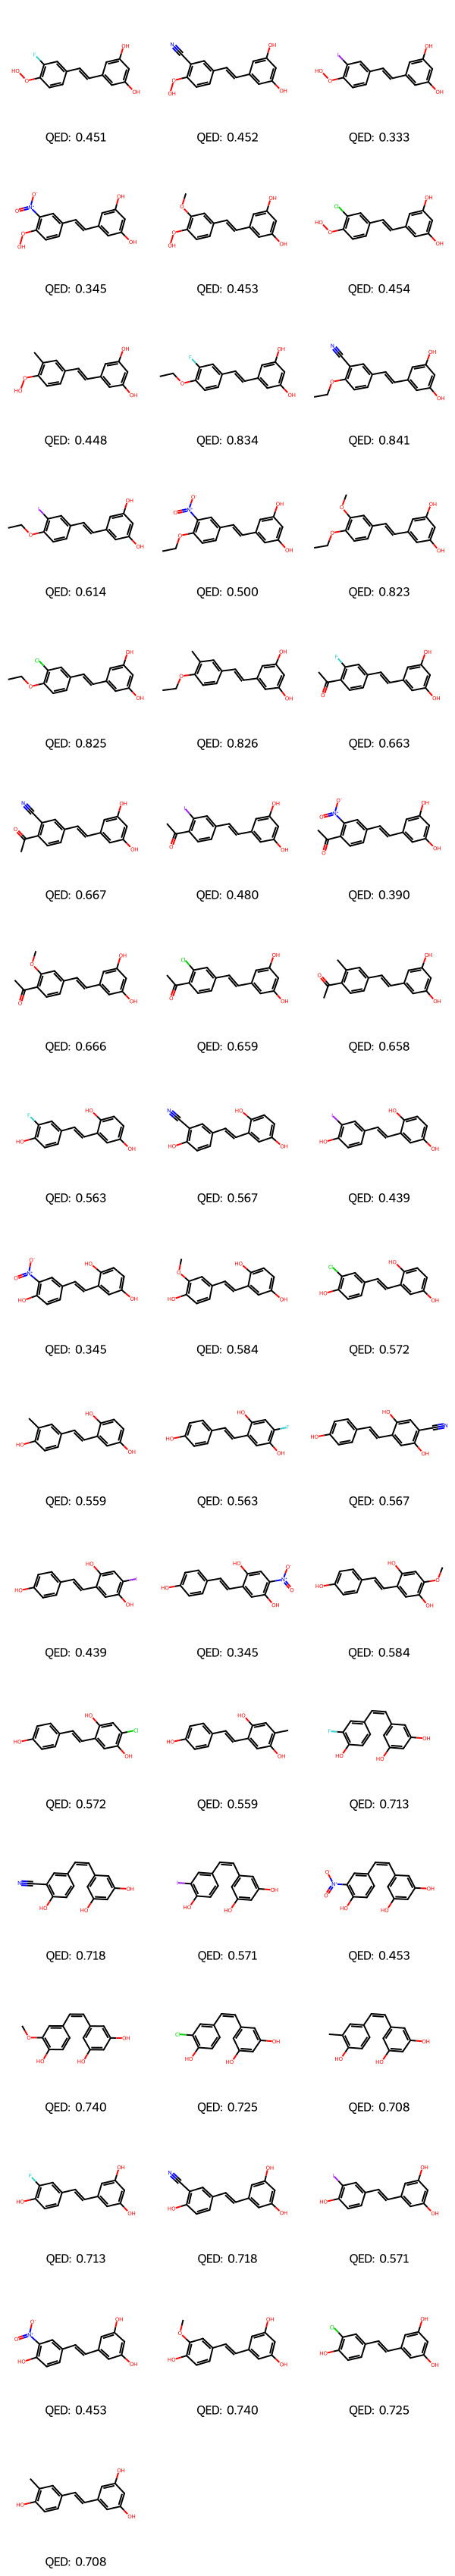

In [ ]:
Chem.Draw.MolsToGridImage(total_mols, legends = qed_leg)

## Save XYZ files and visualize

In [ ]:
for i,smile in enumerate(smiles_list):
  filename = f"mol{i}.xyz"
  _ = ccs.smileToXYZ(smile,filename)

XYZ file saved as mol0.xyz
XYZ file saved as mol1.xyz
XYZ file saved as mol2.xyz
XYZ file saved as mol3.xyz
XYZ file saved as mol4.xyz
XYZ file saved as mol5.xyz
XYZ file saved as mol6.xyz


In [ ]:
f = open("mol0.xyz","r")
structure = f.read()
f.close()

ccs.visualize_molecule(structure)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.